# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

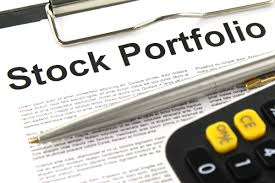

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (5 puntos).
4. Graficar los rendimientos (5 puntos).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [38]:
data_yahoo=web.DataReader(name=['^GSPC','MSFT','WBA','TSLA'],
                          data_source='yahoo',
                          start='2011-01-01'
                          )

docs= ['^GSPC','MSFT','WBA','TSLA']
start='2011-01-01'

def get_adj_closes(tickers, start_date= '2011-01-01' , end_date='2015-12-15'):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

Adj= get_adj_closes(tickers=docs,
                      start_date=start
                      )
Adj.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-03,22.558224,26.620001,32.172199,1271.869995
2011-01-04,22.646908,26.670000,32.442204,1270.199951
2011-01-05,22.574345,26.830000,32.892216,1276.560059
2011-01-06,23.235449,27.879999,32.990410,1273.849976
2011-01-07,23.058081,28.240000,32.794048,1271.500000


docs = ['^GSPC','MSFT','WBA','TSLA']
def read_AdjClose(docs):
    res = pd.read_csv(docs[0]+'.csv',index_col='Date')['Adj Close']
    for i in range(len(docs)-1): 
        a = pd.read_csv(docs[i+1]+'.csv',index_col='Date')
        res = pd.concat([res,a['Adj Close']],axis=1)
    res.columns = docs
    return(res)


Adj = read_AdjClose(docs)
Adj.head()

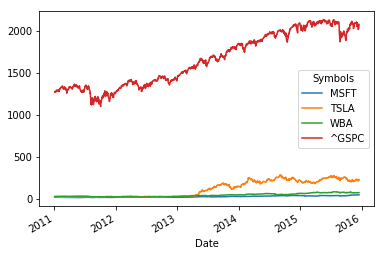

In [39]:
Adj.plot();

In [40]:
pct = Adj.pct_change().dropna()
pct.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-04,0.003931,0.001878,0.008392,-0.001313
2011-01-05,-0.003204,0.005999,0.013871,0.005007
2011-01-06,0.029286,0.039135,0.002985,-0.002123
2011-01-07,-0.007634,0.012913,-0.005952,-0.001845
2011-01-10,-0.013287,0.007436,0.021706,-0.001376


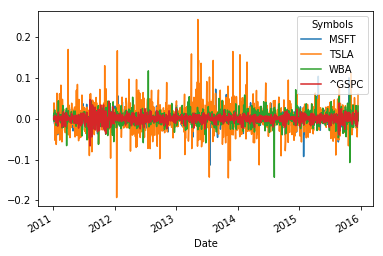

In [41]:
pct.plot();

## 2. Rendimiento esperado y volatilidad para cada activo (30 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).

In [42]:
#Rendimientos diarios
pct_mean = pct.mean()
pct_mean

Symbols
MSFT     0.000779
TSLA     0.002295
WBA      0.000841
^GSPC    0.000439
dtype: float64

In [43]:
#Volatilidad diaria
pct_std = pct.std()
pct_std

Symbols
MSFT     0.014815
TSLA     0.033357
WBA      0.016267
^GSPC    0.009731
dtype: float64

In [44]:
#Rendimiento esperado y volatilidad anualizados. 
pct_summary = pd.DataFrame(data={'Mean':252*pct_mean,'Volatility':np.sqrt(252)*pct_std},index=pct.columns)
pct_summary

,Mean,Volatility
Symbols,,
MSFT,0.196201,0.235181
TSLA,0.578321,0.529533
WBA,0.211946,0.258236
^GSPC,0.110699,0.154477


In [45]:
# De esta forma se calcularía la covarianza entre cada una de las variables
# Aquí se calcula la covarianza entre TSLA y MSFT. 
cov_Tsla_Msft = ((pct.MSFT-pct_mean.MSFT)*(pct.TSLA-pct_mean.TSLA)).mean()  
cov_Tsla_Msft

0.00012032304344640901

In [46]:
# Se podría hacer lo anterior manualmente, sin embargo, Pandas ya tiene integrada una matriz de covarianzas. 
pct_cov = pct.cov()
# pct_cov = np.cov(pct.iloc[:,1::].T) También es posible calcularlos con Numpy. 
pct_cov

Symbols,MSFT,TSLA,WBA,^GSPC
Symbols,,,,
MSFT,0.000219,0.000120,0.000071,0.000091
TSLA,0.000120,0.001113,0.000083,0.000125
WBA,0.000071,0.000083,0.000265,0.000074
^GSPC,0.000091,0.000125,0.000074,0.000095


In [47]:
# De la misma forma, así se calcularía la correlación entre cada una de las variables
# Aquí se calcula la Correlacion entre TSLA y MSFT. 
corr_Tsla_Msft = cov_Tsla_Msft/(pct_std.MSFT*pct_std.TSLA)
corr_Tsla_Msft

0.24347448589945098

In [48]:
# Utilizando Pandas.
pct_corr = pct.corr(method='pearson')
pct_corr

Symbols,MSFT,TSLA,WBA,^GSPC
Symbols,,,,
MSFT,1.000000,0.243670,0.296048,0.633781
TSLA,0.243670,1.000000,0.153053,0.384073
WBA,0.296048,0.153053,1.000000,0.469277
^GSPC,0.633781,0.384073,0.469277,1.000000


La matriz de correlación proporcionada por Pandas y la calculada manualmente difieren en un .02% en el dato de Tsla vs. Msft, sin embargo, supongo que esto se debe a alguna diferencia entre el cálculo de las varianzas como muestrales o poblacionales. 

## 3. Rentimiento esperado y volatilidad para portafolios (30 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (15 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (10 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [49]:
#Portafolio (En ningún portafolio se considera la 'compra' del índice.)
Portfolio = pd.DataFrame([[0,0.3333,0.3333,0.3334],[0,0.3,0.2,0.5],[0,0.5,0.3,0.2],[0,0.2,0.5,0.3]],
                         columns=['^GSPC','MSFT','WBA','TSLA'],index=['P1','P2','P3','P4']) 
Portfolio

,^GSPC,MSFT,WBA,TSLA
P1,0,0.3333,0.3333,0.3334
P2,0,0.3000,0.2000,0.5000
P3,0,0.5000,0.3000,0.2000
P4,0,0.2000,0.5000,0.3000


In [50]:
#Se calculan rendimientos como si tomaramos los portafolios en forma de activo individual
Individual_rend = pct_mean.dot(Portfolio.T)
Individual_rend

P1    0.001305
P2    0.001549
P3    0.001101
P4    0.001265
dtype: float64

In [51]:
#Se calculan rendimientos como si tomaramos los portafolios en forma de activo individual
Individual_std = pct_std.dot(Portfolio.T)
Individual_std

P1    0.021481
P2    0.024377
P3    0.018959
P4    0.021104
dtype: float64

In [52]:
#Rendimientos y volatilidad reportados tomando los activos por separado. 
Individual_summary = pd.DataFrame(data={'Mean':Individual_rend*252,'Volatility':np.sqrt(252)*Individual_std},
                        index=['P1','P2','P3','P4']) 
Individual_summary

,Mean,Volatility
P1,0.328848,0.341002
P2,0.390410,0.386968
P3,0.277349,0.300968
P4,0.318710,0.335014


In [53]:
#Rendimiento
Portfolio_rend = pct_mean.dot(Portfolio.T)
Portfolio_rend

P1    0.001305
P2    0.001549
P3    0.001101
P4    0.001265
dtype: float64

In [54]:
#Volatilidad
Portfolio_vol = np.zeros((4,))
for i in range(4):
    Portfolio_vol[i] = (Portfolio.iloc[i,:].dot(Portfolio.iloc[i,:].dot(pct_cov)))**(1/2)
Portfolio_vol = pd.Series(Portfolio_vol,index=['P1','P2','P3','P4'])
Portfolio_vol

P1    0.015445
P2    0.019231
P3    0.013366
P4    0.015123
dtype: float64

In [55]:
# Rendimiento esperado y Volatilidad no anualizados
Portfolio_summary = pd.DataFrame(data={'Mean':Portfolio_rend,'Volatility':Portfolio_vol},index=Portfolio.index)
Portfolio_summary

,Mean,Volatility
P1,0.001305,0.015445
P2,0.001549,0.019231
P3,0.001101,0.013366
P4,0.001265,0.015123


In [56]:
# Rendimiento esperado y Volatilidad anualizados
Portfolio_summary = pd.DataFrame(data={'Mean':252*Portfolio_rend,'Volatility':np.sqrt(252)*Portfolio_vol},index=Portfolio.index)
Portfolio_summary

,Mean,Volatility
P1,0.328848,0.245176
P2,0.390410,0.305276
P3,0.277349,0.212179
P4,0.318710,0.240076


Se puede notar que la diferencia del rendimiento esperado es nula entre un portafolio en el cual se toman los activos por separado y uno en el que se toman los activos como un conjunto (portafolio). Por otra parte, el riesgo en el primero de los portafolios se reporta muy alto, mientras que en el segundo caso se reportan riesgos bastante considerables. 

## 4. Gráfico de rendimientos esperados vs. volatilidad (20 puntos)

Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente.

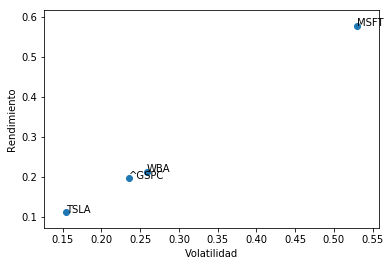

In [57]:
# Activos 
X,Y = pct_summary['Volatility'],pct_summary['Mean']

plt.scatter(X,Y)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
for i in range(len(docs)):
    plt.text(X[i],Y[i],docs[i])

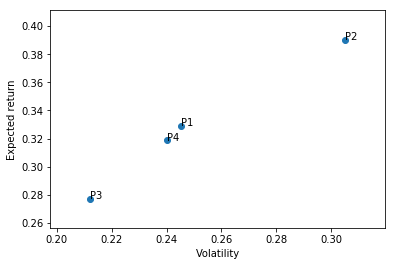

In [58]:
# Portafolio de los 3 activos

X = Portfolio_summary['Volatility']
Y = Portfolio_summary['Mean']

plt.scatter(X,Y)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
for i in range(len(Portfolio.iloc[:,1])):
    plt.text(X[i],Y[i],Portfolio.index[i])

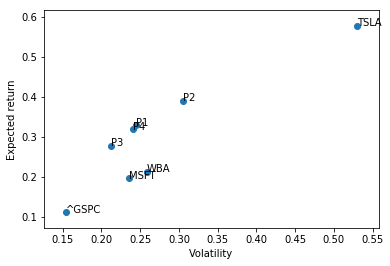

In [59]:
# Graficar los portafolios y los Activos en un la misma imagen.
X = pd.concat([Portfolio_summary['Volatility'],pct_summary['Volatility']])
Y = pd.concat([Portfolio_summary['Mean'],pct_summary['Mean']])

plt.scatter(X,Y)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
for i in range(len(X)):
    plt.text(X[i],Y[i],X.index[i])

Se puede apreciar que los activos por separado tienen un comportamiento muy riesgoso, si se adquiere una gran cantidad de activos de una sola acción es probable que se obtengan buenas ganancias, no obstante, un portafolio podría generar 'buenos' rendimientos a costa de un riesgo mucho menor al ofrecido por cualquiera de los activos individualmente. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>